# Exercise: Data Pre-Processing and EDA  
### COVID-19 Dataset  
The goal is to **predict the urgency** with which a COVID-19 patient will need to be admitted to the hospital from the time of onset of symptoms. The dataset contains some COVID-19 symptoms and demographic information.  This dataset was collected in the peak of a COVID-19 wave and hence may have some errors and missing data. The aim of this exercise is to pre-process the given data and create a clean dataset to use for modelling and inference. Additionally, you are required to perform some EDA to understand the data better.  

Primary predictors:
- age  
- sex  
- cough, fever, chills, sore_throat, headache, fatigue. For each: 1 if have symptom, 0 if no symptom  

Response variable:  Urgency of admission where  
- 1 => High Urgency which means the patient was admitted within 1 day from the onset of symptoms  
- 0 => No Urgency - everyone else  

### Instructions:  
- Import the necessary libraries  
- Read the file covid.csv as a pandas dataframe and take a quick look at the data to understand it
- Run checks to check if there are any missing values. If so, find the number of rows with missing values
- Perform kNN imputation with k value as 5 to fill in the missing values. Remember Urgency is the response variable
- Plot a graph to figure out which age group has the most urgent need for a hospital bed
- Plot a graph to figure out which symptom is the most common one for patients with urgent need of hospitalization
- Plot a graph to figure out whether patients with no urgency have cough as a more common symptom when compared to patients with urgent need of hospitalization
- Split the data into train and test sets with 70% train data and the remaining for test with a random state of 60
- Save these subsets as csv files without including the default indices

Hints:
pd.read_csv(filename)
 Returns a pandas dataframe containing the data and labels from the file data


pd.to_csv(filename)
 Write to a CSV file 


df.head()
Returns the first 5 rows of the dataframe with the column names


KNNImputer(n_neighbors=k_value)
Imputation for completing missing values using k-Nearest Neighbors


plt.xlabel()
This is used to specify the text to be displayed as the label for the x-axis


plt.ylabel()
This is used to specify the text to be displayed as the label for the y-axis


plt.title()
This is used to specify the title to be displayed for the plot 


train_test_split()
Splits the data into random train and test subsets

In [1]:
# Import necessary libraries

# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [2]:
# Read the datafile "covid.csv"
df = pd.read_csv("covid.csv")

# Take a quick look at the dataframe
df.head(10) # I use 10 so I can see at least 1 NaN


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
5,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,38.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,1
7,45.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
8,45.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
9,45.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [3]:
# Check if there are any missing or Null values
missing_values_by_columns = df.isnull().sum()
missing_values_by_rows = df.isnull().sum(axis=1)
print(f"Missing values by columns: \n{missing_values_by_columns}", end="\n\n") # I see that Urgency don't have missing values, otherwise I should drop them
# print(f"Missing values by rows: \n{missing_values_by_rows}")


Missing values by columns: 
age             6
sex             8
cough          11
fever          15
chills          4
sore_throat     6
headache        2
fatigue         4
Urgency         0
dtype: int64



In [4]:
### edTest(test_na) ###

# Find the number of rows with missing values
num_null = (missing_values_by_rows > 0).sum()
print("Number of rows with null values:", num_null)


Number of rows with null values: 37


In [5]:
# kNN impute the missing data
# Use a k value of 5

# Your code here
x_knn = df.drop(['Urgency'], axis=1)
df_imputed = KNNImputer(n_neighbors=5).fit_transform(x_knn)
df_imputed

array([[30. ,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       [47. ,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [43. ,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       [58.6,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       [50. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]], shape=(1001, 8))

In [6]:
### edTest(test_impute) ###
# Replace the original dataframe with the imputed data, continue to use df for the dataframe

# Your code here
df_imputed = pd.DataFrame(df_imputed, columns=x_knn.columns)
df_imputed["Urgency"] = df["Urgency"]
df = df_imputed
df.head(10)

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
5,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,38.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
7,45.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
8,45.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
9,45.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0


## EDA

Text(0, 0.5, 'Number of Urgency')

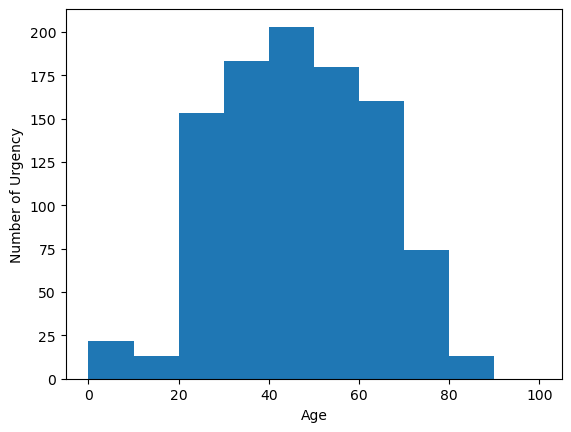

In [7]:
# Plot an appropriate graph to answer the following question
# Your code here

fig, ax = plt.subplots(1, 1)
bins = np.linspace(0, 100, 11).astype(int)
ax.hist(df["age"], bins)
ax.set_xlabel("Age")
ax.set_ylabel("Number of Urgency")

### ⏸ Which age group has the most urgent need for a hospital bed?

#### A. 60 - 70 

#### B. 50 - 60 

#### C. 20 - 30

#### D. 40 - 50

In [8]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = 'D'


<BarContainer object of 4 artists>

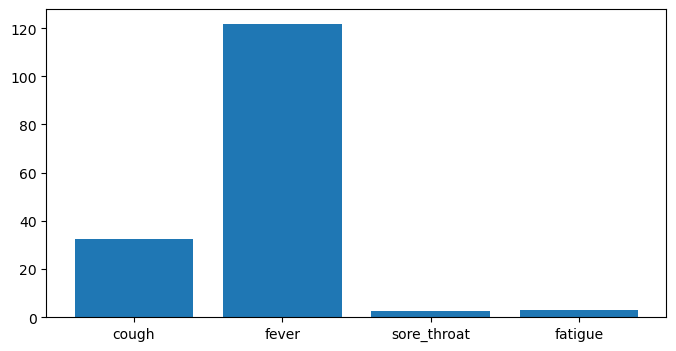

In [9]:
# Plot an appropriate graph to answer the following question    
# Your code here

# Setup a grid for plotting data
fig, ax = plt.subplots(figsize=(8, 4))

# Get data for patients with Urgency == 1
symptoms = ["cough", "fever", "sore_throat", "fatigue"]
patients_with_urgency = df[df["Urgency"] == 1]
count_symptoms = patients_with_urgency[symptoms].sum(axis=0).values
column_names = patients_with_urgency[symptoms].columns

# Plot
ax.bar(column_names, count_symptoms)

### ⏸ Among the following symptoms, which is the most common one for patients with urgent need of hospitalization?

#### A. Cough

#### B. Fever

#### C. Sore Throat

#### D. Fatigue

In [10]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer2 = 'B'

Number of patiens with cough and Urgent are: 492, and not Urgent: 509


Text(0, 0.5, 'Number of cough')

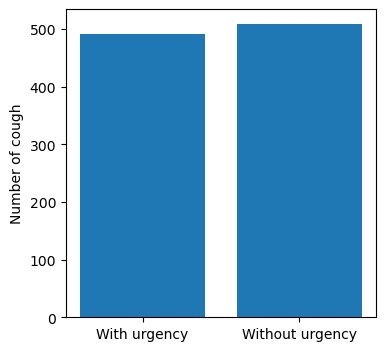

In [11]:
# Plot an appropriate graph to answer the following question    
# Your code here

# Setup grid
fig, ax = plt.subplots(figsize=(4, 4))

# Data with Cough and Urgency
cough_table = df[["cough", "Urgency"]]
cough_with_urgency = cough_table["Urgency"].sum()
cough_without_urgency = cough_table.shape[0] - cough_with_urgency
print(f"Number of patiens with cough and Urgent are: {cough_with_urgency}, and not Urgent: {cough_without_urgency}")
ax.bar(["With urgency", "Without urgency"], [cough_with_urgency, cough_without_urgency])
ax.set_ylabel("Number of cough")

    ### ⏸ As compared to patients with urgent need of hospitalization, patients with no urgency have cough as a more common symptom?

#### A. True

#### B. False

#### C. It is the same

#### D. Cannot say

In [12]:
### edTest(test_chow3) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer3 = 'A'

### Train Test Split

In [13]:
### edTest(test_split) ###
# Split the data into train and test sets with 70% for training
# Use random state of 60 and set of data as the train split

# Your code here
df_train, df_test = train_test_split(df, train_size=0.7, random_state=60)

In [14]:
# Save the train data into a csv called "covid_train.csv"
# Remember to not include the default indices
df_train.to_csv("covid_train.csv", index=False)

# Save the test data into a csv called "covid_test.csv"
# Remember to not include the default indices
df_test.to_csv("covid_test.csv", index=False)
